In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━╸━━━━━━━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [23]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [10]:
print("Question 1")

Question 1


In [4]:
tesla = yf.Ticker("TSLA")

In [5]:
tesla_data = tesla.history(period="max")

In [6]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [11]:
print("Question 2")

Question 2


In [14]:
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data  = requests.get(url).text

In [22]:
soup = BeautifulSoup(html_data,"html5lib")

FeatureNotFound: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?

In [16]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [18]:
for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

NameError: name 'soup' is not defined

In [27]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [28]:
tesla_revenue.tail()

,Date,Revenue


In [26]:
print("Question 3")

Question 3


In [ ]:
GameStop = yf.Ticker("GME")

In [47]:
gme_data= GameStop.history(period = 'max')

NameError: name 'GameStop' is not defined

In [35]:
gme_data.reset_index(inplace=True)
gme_data.head()

NameError: name 'gme_data' is not defined

In [36]:
print("Question 4")

Question 4


In [37]:
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data  = requests.get(url).text

In [38]:
soup = BeautifulSoup(html_data,"html5lib")

FeatureNotFound: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?

In [39]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [ ]:
for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    
    gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index = True)

In [ ]:
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[tesla_revenue['Revenue'] != ""]

In [40]:
gme_revenue.tail()

,Date,Revenue


In [42]:
print("Question 5")


Question 5


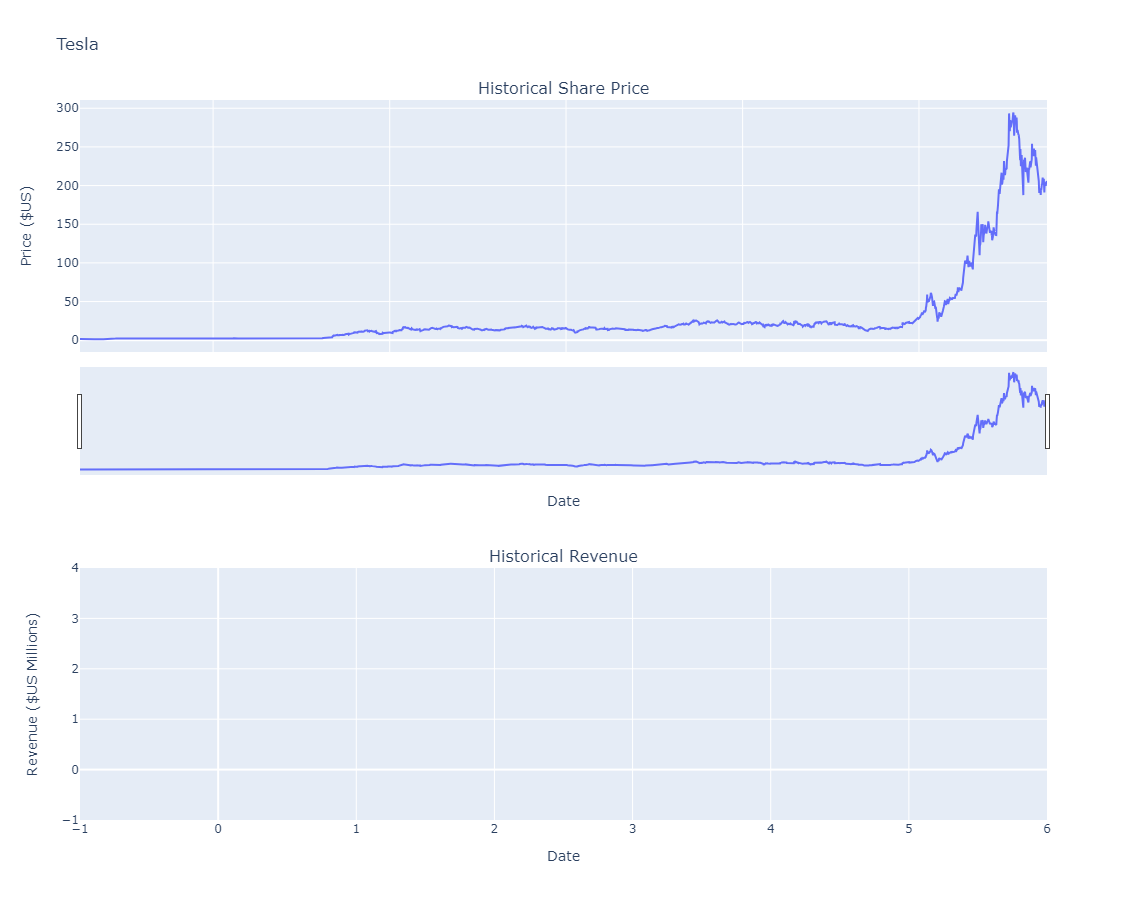

In [46]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

In [43]:
print("Question 6")

Question 6


In [44]:
make_graph(gme_data, gme_revenue, 'GameStop')


NameError: name 'gme_data' is not defined